## Data science snippets
### Neural network for prediction of dynamics of Lorenz system.

The purpose of this snippet is to illustrate the data-driven approach for 
time evolution prediction of dynamic systems on the example of Lorenz system.

The Lorenz system dynamics is governed by the nonlinear system of differential equations
\begin{align}
\dfrac{\partial x}{\partial t} &= \sigma (y - x), \\
\dfrac{\partial y}{\partial t} &= x (\rho - z) - y, \\
\dfrac{\partial z}{\partial t} &= x y - \beta z,
\end{align}
where $\sigma$, $\rho$, $\beta$ are constants. 
The aim of the neural network is to learn the nonlinear mapping from state vector $\boldsymbol{s}(t_i) = [x(t_i), y(t_i), z(t_i)]$ at time moment $t_i$ to state 
$\boldsymbol{s}(t_{i+1}) = [x(t_{i+1}), y(t_{i+1}), z(t_{i+1})]$ at time moment $t_{i+1}.$

The training dataset is generated by the numberical simulation of Lorenz system.

In [96]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [57]:
def get_lorenz(xyz0: np.ndarray, r: float=28, s: float=10, b: float=8/3) -> np.ndarray:
    """Simation of Lorenz system for given initial conditions."""
    x0, y0, z0 = xyz0
    x = s * (y0 - x0)
    y = x0 * (r - z0) - y0
    z = x0 * y0 - b * z0
    return np.array([x, y, z])

In [92]:
n_steps = 1000
n_traject = 10
dt = 0.01

# generate random points for initial strates
init_states = np.random.uniform(low=-15, high=15, size=(n_traject, 3))
# generate dataset with trajectories 
xyz = np.zeros((n_steps * n_traject, 3))
# assemble the dataset 
for j in range(n_traject):
    for i in range(n_steps-1):
        if i % (n_steps + 1) == 0:
            xyz[i + j * n_steps] = init_states[j]
            print(i + j * n_steps)
        dot_xyz = get_lorenz(xyz[i + j * n_steps])
        xyz[i + j * n_steps + 1] = xyz[i + j * n_steps] + dt * dot_xyz

print(init_states)
print(xyz.shape)
print(xyz[0])
print(xyz[1000])
print(xyz[2000])
print(xyz[3000])
print(xyz[4000])

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
[[-10.27882176 -11.44127474 -10.96985617]
 [  6.30004499   4.96305568   2.53287036]
 [  7.80543543  13.20929805   7.7815383 ]
 [-13.13760826 -14.89767      3.43368787]
 [ -9.7606716    7.52566681   1.42929527]
 [ 10.37256785  -1.12575088   2.4297904 ]
 [ 14.70875018  -1.9127863   -5.15534564]
 [ -1.64166285  11.66714266  -2.62498459]
 [ -3.84418442   4.77449346   2.61945825]
 [  2.92834983   7.37407053  -3.56552802]]
(10000, 3)
[-10.27882176 -11.44127474 -10.96985617]
[6.30004499 4.96305568 2.53287036]
[ 7.80543543 13.20929805  7.7815383 ]
[-13.13760826 -14.89767      3.43368787]
[-9.7606716   7.52566681  1.42929527]


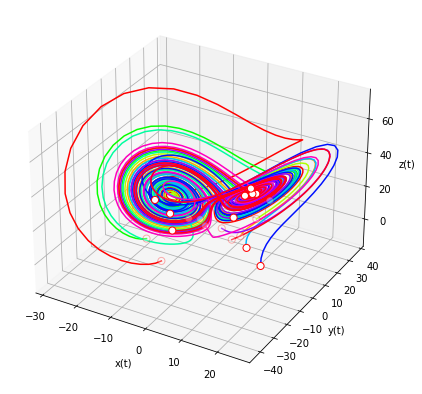

In [95]:
cmap = plt.cm.get_cmap('hsv', n_traject)
# display attractor
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection="3d")
for k in range(n_traject):
    ax.plot(xyz[n_steps * k : n_steps * k + n_steps - 1, 0], xyz[n_steps * k : n_steps * k + n_steps - 1, 1], xyz[n_steps * k : n_steps * k + n_steps - 1, 2], color=cmap(k))
    ax.scatter(xyz[[n_steps * k, n_steps * k + n_steps - 1], 0], xyz[[n_steps * k, n_steps * k + n_steps - 1], 1], xyz[[n_steps * k, n_steps * k + n_steps - 1], 2], marker='o', s=50, facecolor='w', edgecolors='r')
ax.set_xlabel("x(t)")
ax.set_ylabel("y(t)")
ax.set_zlabel("z(t)")
plt.show()

In [114]:
# assemble the training dataset
X = xyz[::2]
Y = xyz[1::2]

print(X.shape)
print(Y.shape)

3
(5000, 3)


In [159]:
def model():
    """ """
    model = keras.Sequential()
    model.add(layers.Dense(10, input_dim=X.shape[1], activation='sigmoid'))
    model.add(layers.Dense(10, activation='linear'))
    model.add(layers.Dense(10, activation='linear'))
    model.add(layers.Dense(Y.shape[1], activation='linear'))
    # compile the keras model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    # fit the keras model on the dataset
    model.fit(X, Y, epochs=1000, batch_size=1000)
    return model


In [160]:
model = model()

poch 801/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.2280 - accuracy: 0.9976
Epoch 802/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.2268 - accuracy: 0.9978
Epoch 803/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.2261 - accuracy: 0.9978
Epoch 804/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.2254 - accuracy: 0.9976
Epoch 805/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.2258 - accuracy: 0.9974
Epoch 806/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.2262 - accuracy: 0.9972
Epoch 807/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.2257 - accuracy: 0.9978
Epoch 808/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.2245 - accuracy: 0.9980
Epoch 809/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.2229 - accuracy: 0.9974
Epoch 810/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.2227 - accuracy: 0.9976
E

In [162]:
print(model.predict(np.array([X[0]])))
print(X[0], Y[0])

[[-10.348534 -13.150219 -11.244109]]
[-10.27882176 -11.44127474 -10.96985617] [-10.39506705 -15.33250404  -9.50129843]
